[[  15900.7572831 ]
 [5234016.86040387]]


/var/folders/p1/vychbyg51cs0s16tvzh88pk00000gn/T/ipykernel_43742/3948000311.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date3['index']=cmp1


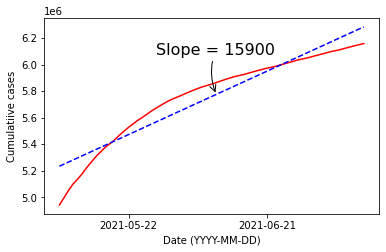

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

df = pd.read_csv('covid_19_india.csv')

cases=df[["Date","State","Confirmed"]]

cases=cases.loc[cases['State']== 'Maharashtra']

date=cases.loc[(cases['Date'] >= '2020-06-01')& (cases['Date'] < '2020-09-15')]
date1=cases.loc[(cases['Date'] >= '2020-09-15')& (cases['Date'] < '2020-12-30')]
date2=cases.loc[(cases['Date'] >= '2021-03-01')& (cases['Date'] < '2021-05-07')]
date3=cases.loc[(cases['Date'] >= '2021-05-07')& (cases['Date'] < '2021-07-13')]
date4=cases.loc[(cases['Date'] >= '2020-06-01')& (cases['Date'] < '2020-12-30')]
date5=cases.loc[(cases['Date'] >= '2021-03-01')& (cases['Date'] < '2021-07-13')]

cmp=range(0,106)
cmp1=range(0,67)
cmp2=range(0,212)
cmp3=range(0,134)
date3['index']=cmp1

X1= date3.iloc[:,3].values.reshape(-1,1)
X= date3.iloc[:,0]
Y= date3.iloc[:,2].values.reshape(-1,1)

x=X1.flatten()
pos=len(X1)*0.5

current_figure = plt.gcf()
current_figure.autofmt_xdate()
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X1, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X1)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.plot(X,Y,'r-')
plt.plot(X1,Y_pred,'b--')
plt.plot
plt.xlabel("Date (YYYY-MM-DD)")
plt.ylabel("Cumulatiive cases")
plt.annotate(r'Slope = 15900', 
             xy=(34,Y_pred[34] ), 
             xycoords='data',
             xytext=(-60, +40),
             textcoords='offset points',
             fontsize=16,  
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')
            )
slope_intercept = np.polyfit(x,Y_pred,1)
print(slope_intercept)
plt.show()

